In [16]:
import time 
import requests
import cv2
import operator
import numpy as np
import os
from IPython.display import Image


In [10]:
# Variables
_url = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/ocr'
_key = "0205e6a47acb439b90f629bd8bd041e8"  #Here you have to paste your primary key
_maxNumRetries = 10

In [11]:
def processRequest( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:
        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429:
            print( "Message: %s" % ( response.json() ) )
            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break
        elif response.status_code == 202:
            result = response.headers['Operation-Location']
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json() ) )
        break
        
    return result

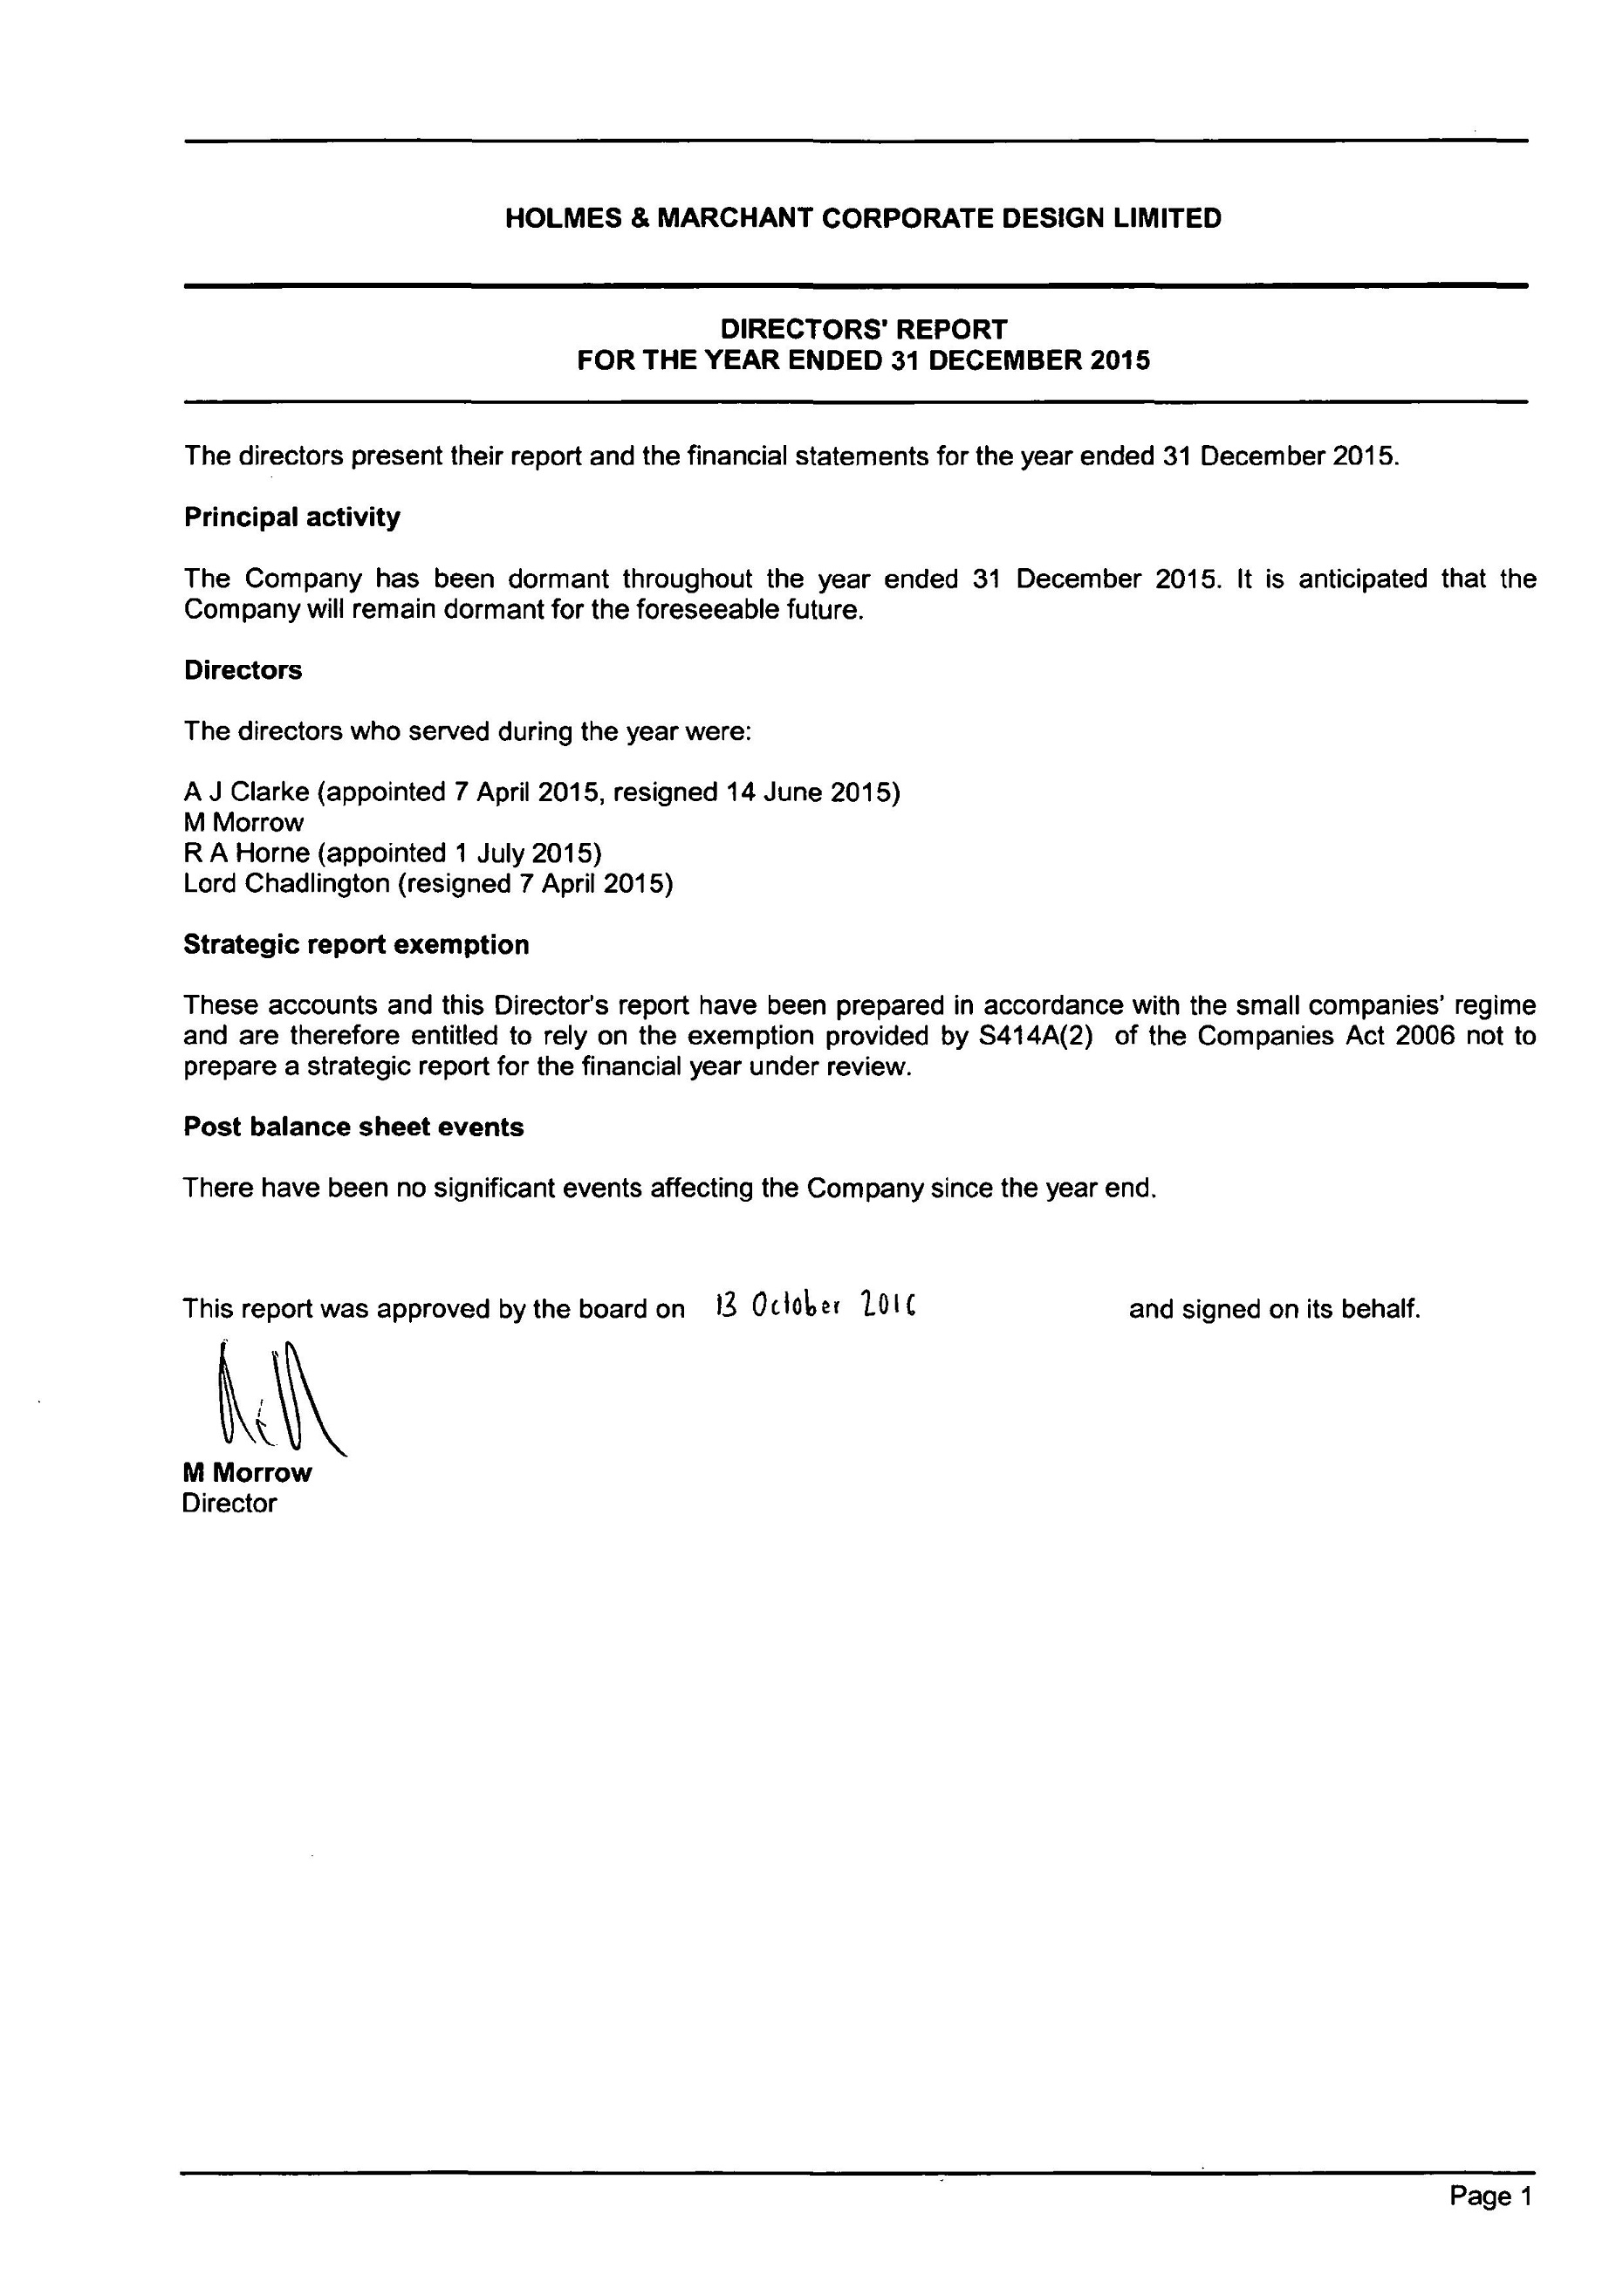

In [18]:
document = r'C:/Users/virtualmachine2/cog_vision/01883182_accounts_2015-12-31-4.jpg'
Image(document)

In [19]:
# Load raw image file into memory
pathToFileInDisk = document
with open(pathToFileInDisk, 'rb') as f:
    data = f.read()

# Computer Vision parameters
params = {'handwriting' : 'true'}

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'

json = None

operationLocation = processRequest(json, data, headers, params)


Error code: 200
Message: {'language': 'en', 'orientation': 'Up', 'textAngle': 0.0, 'regions': [{'boundingBox': '209,237,1552,1141', 'lines': [{'boundingBox': '581,237,819,25', 'words': [{'boundingBox': '581,237,131,24', 'text': 'HOLMES'}, {'boundingBox': '724,237,20,24', 'text': '&'}, {'boundingBox': '755,237,177,24', 'text': 'MARCHANT'}, {'boundingBox': '943,237,195,25', 'text': 'CORPORATE'}, {'boundingBox': '1150,238,114,23', 'text': 'DESIGN'}, {'boundingBox': '1277,237,123,24', 'text': 'LIMITED'}]}, {'boundingBox': '827,364,328,25', 'words': [{'boundingBox': '827,364,190,25', 'text': "DIRECTORS'"}, {'boundingBox': '1028,365,127,24', 'text': 'REPORT'}]}, {'boundingBox': '663,400,655,25', 'words': [{'boundingBox': '663,400,65,24', 'text': 'FOR'}, {'boundingBox': '737,400,62,24', 'text': 'THE'}, {'boundingBox': '807,400,87,23', 'text': 'YEAR'}, {'boundingBox': '905,400,106,25', 'text': 'ENDED'}, {'boundingBox': '1022,402,29,23', 'text': '31'}, {'boundingBox': '1066,400,175,25', 'text':

In [15]:
operationLocation